# Time Variant Pricing

Power consumption varies throughout the day and so can its cost. Taking a look at both using integrals can determine the cost of the electricity for a single day. 

In [1]:
from matplotlib.pyplot import *
import numpy as np

## Power Usage

I logged onto my utility company's webpage and took a look at my power consumption on a random day this summer. The curve, $0.8sin(0.5t-1.5)+1.5$, approximates the relationship between time of day ($t$) in hours, and usage in kilowatt hours.

Next, I implement a function for this curve and created a plot for a single day.

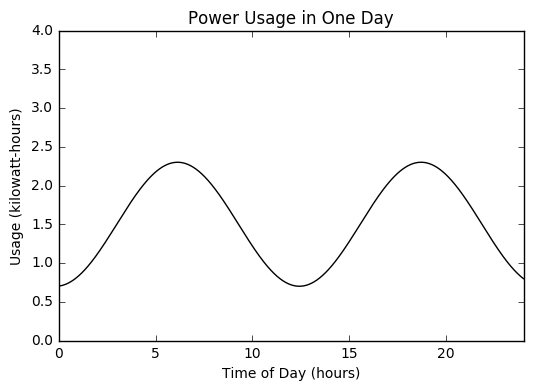

In [2]:
# Power usage function
def power(t):
    f = .8*np.sin(0.5*t-1.5)+1.5
    return f

# x-space is 0 to 24 in hours
x = np.ndarray.tolist(np.arange(0, 24, 0.01))
y = [power(i) for i in x]
  
# Plot usage
xlim(0,24)
ylim(0,4)
plot(x,y,c='k')
xlabel('Time of Day (hours)')
ylabel('Usage (kilowatt-hours)')
title('Power Usage in One Day')
show()

## Utility Price

Time-of-use pricing is one type of time variant pricing. It defines fixed periods of the day and the price of electricity at each period. Essentially, electricity will cost more during times when it is in greater demand. Time-of-use is just one way to implement time variant pricing, so if you are interested in other approaches, this [link](http://blogs.edf.org/energyexchange/2015/01/27/all-electricity-is-not-priced-equally-time-variant-pricing-101/) contains more detailed information. 

I define a function for a possible time-of-use pricing plan which happens not to be continuous. Then I plot each section to show how the rate changes over time.

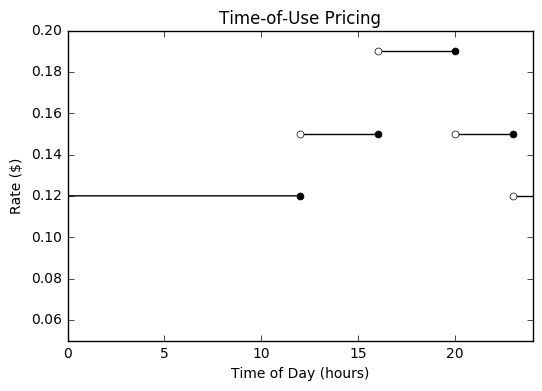

In [3]:
# Rate piecewise function 
def cost(t):
    if t <= 12:
        f = 0.12
    elif t <= 16:
        f = 0.15
    elif t <= 20:
        f = 0.19
    elif t <= 23:
        f = 0.15
    else:
        f = 0.12
    return f

# Create separate lists of each piece for plotting
x1 = np.ndarray.tolist(np.arange(0, 12, 0.01))
x2 = np.ndarray.tolist(np.arange(12.000001 , 16, 0.01))
x3 = np.ndarray.tolist(np.arange(16.000001 , 20, 0.01))
x4 = np.ndarray.tolist(np.arange(20.000001 , 23, 0.01))
x5 = np.ndarray.tolist(np.arange(23.000001 , 24, 0.01))
z1 = [cost(i) for i in x1]
z2 = [cost(i) for i in x2]
z3 = [cost(i) for i in x3]
z4 = [cost(i) for i in x4]
z5 = [cost(i) for i in x5] 

# Plot power rates
xlim(0,24)
ylim(0.05,0.2)
plot(x1, z1, c='k')
plot(x2, z2, c='k')
plot(x3, z3, c='k')
plot(x4, z4, c='k')
plot(x5, z5, c='k')
plot(12, 0.12, marker='o', markersize=5, color="black", mec="black")
plot(12, 0.15, marker='o', markersize=5, color="white", mec="black")
plot(16, 0.15, marker='o', markersize=5, color="black", mec="black")
plot(16, 0.19, marker='o', markersize=5, color="white", mec="black")
plot(20, 0.19, marker='o', markersize=5, color="black", mec="black")
plot(20, 0.15, marker='o', markersize=5, color="white", mec="black")
plot(23, 0.15, marker='o', markersize=5, color="black", mec="black")
plot(23, 0.12, marker='o', markersize=5, color="white", mec="black")
xlabel('Time of Day (hours)')
ylabel('Rate ($)')
title('Time-of-Use Pricing')
show()

## Cost at a Point in Time

The product of the rate and consumption is my cost at a given point in time. The integral of this function over 24 hours, would be the cost of electricity I would need to pay for that day when the bill comes. 

I plot the product of the two functions and filled in the area representing the integral. The colors correspond to the different rate tiers. 

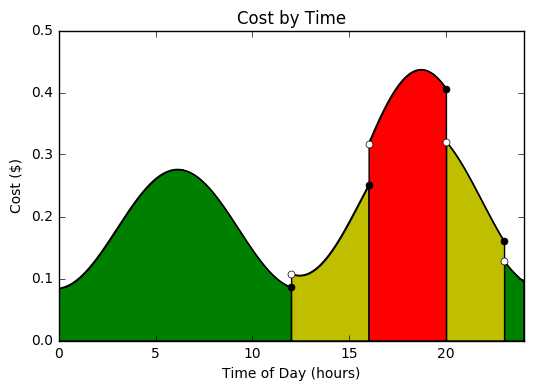

In [4]:
# Calcuate the product of usage and rate
c1 = [cost(i)*power(i) for i in x1]
c2 = [cost(i)*power(i) for i in x2]
c3 = [cost(i)*power(i) for i in x3]
c4 = [cost(i)*power(i) for i in x4]
c5 = [cost(i)*power(i) for i in x5] 

# Plot cost at a given point of time
xlim(0,24)
ylim(0,0.5)
plot(x1, c1, c='k')
plot(x2, c2, c='k')
plot(x3, c3, c='k')
plot(x4, c4, c='k')
plot(x5, c5, c='k')
plot(12, 0.12*power(12), marker='o', markersize=5, color="black", mec="black")
plot(12, 0.15*power(12), marker='o', markersize=5, color="white", mec="black")
plot(16, 0.15*power(16), marker='o', markersize=5, color="black", mec="black")
plot(16, 0.19*power(16), marker='o', markersize=5, color="white", mec="black")
plot(20, 0.19*power(20), marker='o', markersize=5, color="black", mec="black")
plot(20, 0.15*power(20), marker='o', markersize=5, color="white", mec="black")
plot(23, 0.15*power(23), marker='o', markersize=5, color="black", mec="black")
plot(23, 0.12*power(23), marker='o', markersize=5, color="white", mec="black")
xlabel('Time of Day (hours)')
ylabel('Cost ($)')
title('Cost by Time')
fill_between(x1,0.0,c1, facecolor = 'g',interpolate=True) 
fill_between(x2,0.0,c2, facecolor = 'y',interpolate=True) 
fill_between(x3,0.0,c3, facecolor = 'r',interpolate=True) 
fill_between(x4,0.0,c4, facecolor = 'y',interpolate=True) 
fill_between(x5,0.0,c5, facecolor = 'g',interpolate=True)
show()

## Calculate Total Cost for Day Using Integral

To calculate the day's total cost, I need to find the definite integral of each piece of the piecewise function plotted above. Because the rate is constant over the piece, I can use the indefinite integral, $1.5t-1.6cos(1.5-0.5t)$, and the cost function.

I define a function to calculate each piece's cost and add them together to get the total.

In [5]:
# Definite integral function
def sum_cost(lower, upper):
    high = 1.5*upper - 1.6*np.cos(1.5-0.5*upper)
    low = 1.5*lower - 1.6*np.cos(1.5-0.5*lower)
    total = cost(upper)*(high - low)
    return total

# Sum each of the pieces
sum1 = sum_cost(0, 12)
sum2 = sum_cost(12, 16)
sum3 = sum_cost(16, 20)
sum4 = sum_cost(20, 23)
sum5 = sum_cost(23, 24)
sum_total = sum1 + sum2 + sum3 + sum4 + sum5

# Plot daily cost
print("Total cost of electricity for the day is ${}".format(round(sum_total,2)))

Total cost of electricity for the day is $5.29


## Calculate Total Cost for the Day Using Midpoint Approximation

Based on the Python modules, I can define a function that uses midpoint approximation to calculate the integral as well. For the default width of the function the cost is the same to the cent.

In [6]:
# Integral approximation
def approx_cost(lower, upper, width=0.0001):
    small_number = 10**-15
    low_bound = lower + small_number
    i = low_bound
    integral = 0
    while i <= upper:
        integral += (cost(i)*power(i)+cost(i+width)*power(i+width))*0.5*width
        i += width
    return integral

# Sum each of the pieces
sum1 = approx_cost(0, 12)
sum2 = approx_cost(12, 16)
sum3 = approx_cost(16, 20)
sum4 = approx_cost(20, 23)
sum5 = approx_cost(23, 24)
sum_total = sum1 + sum2 + sum3 + sum4 + sum5

# Plot daily cost
print("Total approximate cost of electricity for the day is ${}".format(round(sum_total,2)))

Total approximate cost of electricity for the day is $5.29
